# Data Preprocessing for All Software Engineering and Related Jobs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('jobs_dataset.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


## The Dataset as a Whole
Unnecessary data columns are dropped from the dataframe. In addition, since we
are looking at software engineering jobs in the US only, we must filter out the 
jobs that are from other countries.
<br>
<br>
According to the Levels.fyi dataset, the median total yearly compensation for 
software engineers and the like in the US is around $200,000. In terms of total
comp, the data seems to be reasonable, since there are no outragously high/low 
salaries at either extreme. 

In [3]:

# Dictionary holds state names and abbreviations in alphabetical order based on state full name
states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

'''in alphabetical order based on abbreivation states = {
    'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','IA': 'Iowa',
    'ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MS': 'Mississippi',
    'MT': 'Montana','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania',
    'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia', 'WY': 'Wyoming'
}'''

df = df[['company', 'title', 'totalyearlycompensation', 'location',
        'yearsofexperience', 'basesalary', 'stockgrantvalue', 'bonus']]

# Location strings with only one comma are typially US cities. Typical format 
# of the string is "City", "Providence/State", "Country (if not US)"
df = df[df['location'].str.count(',') <= 1]
states_abbr = df['location'].str.slice(start=-2)
df['state'] = states_abbr
# Final round of filtering based on US states
df = df[df.state.isin(states) == True]
df = df.reset_index(drop=True)

#additionally, drop all entries with a basesalary of 0 to prevent outliers in salary averages/medians
df = df[df.basesalary != 0]

#also drop all Washington, DC locations since it won't be accounted for
df = df[df.location != 'Washington, DC']

print(len(df.index))

df.describe()


50204


,totalyearlycompensation,yearsofexperience,basesalary,stockgrantvalue,bonus
count,5.020400e+04,50204.000000,5.020400e+04,5.020400e+04,50204.000000
mean,2.357798e+05,7.227620,1.537815e+05,5.976556e+04,21883.364747
std,1.378027e+05,5.953383,5.017525e+04,8.755132e+04,28279.234597
min,1.100000e+04,0.000000,1.000000e+04,0.000000e+00,0.000000
25%,1.540000e+05,3.000000,1.249405e+05,5.000000e+03,5000.000000
50%,2.010000e+05,6.000000,1.500000e+05,3.000000e+04,16000.000000
75%,2.800000e+05,10.000000,1.750000e+05,7.800000e+04,30000.000000
max,4.980000e+06,69.000000,1.659870e+06,2.800000e+06,1000000.000000


# Statistics By State
According to the bar chart, most tech jobs come from California, which makes 
sense. Following California is Washington State. From the bar graph, we can 
hypothesize that most tech jobs are concentrated in the few tech hubs of the US.

<Axes: xlabel='State', ylabel='Number of Jobs'>

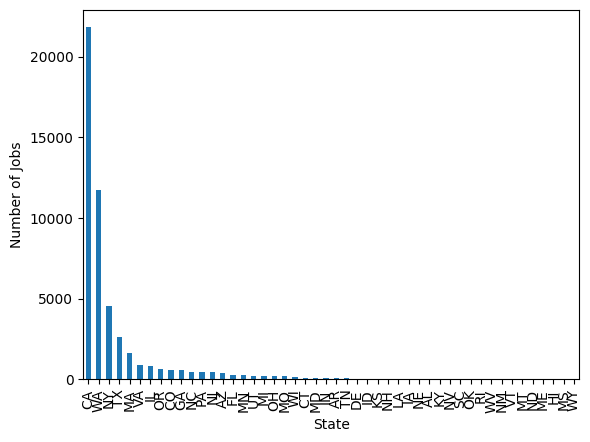

In [4]:
df.state.value_counts().plot(kind='bar', xlabel='State', 
                             ylabel='Number of Jobs')

# Aggregate Data
The following code below takes in the previous dataframe and condenses it into 50 entries, 1 for each state. Each state entry contains information such as median and average salary, median yoe, number of listings and the most common company that shows up within that state. Might have to drop NaN states later.

In [5]:
states3 = [
    'AL',
    'AK',
    'AZ',
    'AR',
    'CA',
    'CO',
    'CT',
    'DE',
    'FL',
    'GA',
    'HI',
    'ID',
    'IL',
    'IN',
    'IA',
    'KS',
    'KY',
    'LA',
    'ME',
    'MD',
    'MA',
    'MI',
    'MN',
    'MS',
    'MO',
    'MT',
    'NE',
    'NV',
    'NH',
    'NJ',
    'NM',
    'NY',
    'NC',
    'ND',
    'OH',
    'OK',
    'OR',
    'PA',
    'RI',
    'SC',
    'SD',
    'TN',
    'TX',
    'UT',
    'VT',
    'VA',
    'WA',
    'WV',
    'WI',
    'WY'
]

dfStates = pd.DataFrame(states3, columns = ['State'])
#dfStates['medianSalary'] = {}
#dfStates['averageSalary'] = {}
#dfStates['listings'] = {}
#dfStates['yearsofexperience'] = {}
#dfStates['commonCompany'] = {}
#dfStates['medianstockval'] = {}

#set up 50 entries with State names
#dfStates['State'] = {0}

#Run 50 loops for each state
#Create a dummy dataframe for each state that's a copy of the larger df
#drop all entires that aren't of the current state being analyzed by the forloop
#look at the data and combine it (ie look for medians of a column, averages, etc)

#df = df[df['state'] == 'WA']
#mode = df.mode()
#print(mode.head())
#mode = mode['company'].item()
#print(mode)
#test = mode
#print(test)

#df = df.dropna()

for i in range(50):
    dfDummy = pd.DataFrame()
    dfDummy = df[df['state'] == states3[i]]

    yoe = dfDummy['yearsofexperience'].median()
    dfStates.at[i, 'yearsofexperience'] = yoe

    listings = dfDummy.shape[0]
    dfStates.at[i, 'listings'] = listings

    salaryMedian = dfDummy['basesalary'].median()
    dfStates.at[i, 'medianSalary'] = salaryMedian

    salaryAvg = dfDummy['basesalary'].mean()
    dfStates.at[i, 'averageSalary'] = salaryAvg

    #print(filler.head(1))
    #mode = dfDummy['company'].mode().item()
    #mode = dfDummy['company'].mode()
    #mode = mode[0:1]
    #test = pd.Series(mode)
    #print(mode.head())
    #test = mode['company'].item()
    #test = str(mode.values[0])
    #print(test[0])

    #print(mode.head())
    #print(dfDummy.mode().item())
    #test = mode['company'].loc[mode.index[0]]
    #print(mode)
    
    #Finds the most common company of just the current state's job listings
    #additionally, it doesn't use dfDummy (even though that contains just the jobs from the current state to prevent errors)
    mode = df[df['state'] == states3[i]].mode()
    if not mode.empty:
        #assuming that a generated mode series wasn't empty
        mode = mode.dropna()
        #print(mode.head())

        #once the mode has been generated, look at its company column and place that into the aggregate data at the current state index
        test = mode['company'].item()
        dfStates.at[i, 'commonCompany'] = test

    #Finds the most common city location for jobs in that state
    mode = df[df['state'] == states3[i]].mode()
    if not mode.empty:
        mode = mode.dropna()

        #once the mode has been generated, look at its locations column and place that into the aggregate data at the current state index
        test = mode['location'].item()
        dfStates.at[i, 'commonLocation'] = test

    #Finds the most common job type for jobs in that state
    mode = df[df['state'] == states3[i]].mode()
    if not mode.empty:
        mode = mode.dropna()

        #once the mode has been generated, look at its locations column and place that into the aggregate data at the current state index
        test = mode['title'].item()
        dfStates.at[i, 'commonJob'] = test

    #medianStock = dfDummy['stockgrantvalue'].median()
    #dfStates.at[i, 'medianstockval'] = medianStock
    #this can show stock value, but I'm not sure how useful that will be (a lot of states have 0)

print(dfStates.head(50))


   State  yearsofexperience  listings  medianSalary  averageSalary  \
0     AL                5.0      24.0      116000.0  113666.666667   
1     AK                NaN       0.0           NaN            NaN   
2     AZ                5.0     372.0      112000.0  115182.795699   
3     AR                5.0      86.0      100000.0  106883.720930   
4     CA                6.0   21820.0      160000.0  168819.025665   
5     CO                6.0     566.0      132000.0  134246.466431   
6     CT                5.5     104.0      110000.0  117259.615385   
7     DE                5.0      57.0      106000.0  111350.877193   
8     FL                6.0     291.0      116000.0  119934.707904   
9     GA                5.0     565.0      117000.0  122129.203540   
10    HI                5.0       4.0      149000.0  142000.000000   
11    ID                6.0      45.0      103000.0  115600.000000   
12    IL                5.0     860.0      125000.0  127840.116279   
13    IN            

# Applying Cost of Living
Cost of living is now applied to the main dataframe (the one with all job entries). The result is a type of standardized salary which is found by dividing the base salary by a factor that represents the cost of living for the national average. In addition, the aggregate dataframe now also contains a column detailing the average cost of living factor (though it does not contain average standardized salary currently).

Process:
Generate a hash map dictionary for cost of living index (make sure to combine City and State and add a comma) and generate an additional general cost of living averages for all each state
Run through the main dataframe and add a standardized salary value column based on if the city exists

For each job entry -> take its location -> use the dictionary to pull out the cost of living factor at that location -> divide the base salary by the factor -> output in the new standardized salary column
    
    If a specific city location doesn't exist, apply the general state cost of living factor instead



In [6]:
coli = pd.read_csv('advisorsmith_cost_of_living_index.csv')
coli['Index Factor'] = coli['Cost of Living Index'] / 100

#prepares a dataframe to be converted into a dictionary by having 1 column as a [city, state] and 1 column as [cost of living factor]
coliCopy = pd.DataFrame()
coliCopy['Location'] = coli['City'] + ", " + coli['State']
coliCopy['Index Factor'] = coli[["Index Factor"]]

#creates a dictionary with keys of cities and a matching value of cost of living factor to that city
coliDict = dict(coliCopy.values)

aggregateIndexFactors = pd.DataFrame()
#used to append for the aggregate data later on, but it's computed during the cost of living stage

#for each state do this:
for i in range(50):
    addedIndexFactor = 0 #the combined Index Factor of one state
    numOccurence = 0 #the number of times that state appears in the cost of living dataset

    #for each row inside the main cost of living index dataframe do this:
    for index, row in coliCopy.iterrows():
        #append location to just the state 
        temp = row['Location'][-2:]

        #try to see if that state is currently being analyzed
        #if it is, then add it to the sum of all other locations in that state
        if states3[i] == temp:
            addedIndexFactor = addedIndexFactor + row['Index Factor']
            numOccurence += 1

    #once all city locations of that state are accounted for, calculate a general state average and append it to the dictionary
    aggregateIndexFactors.loc[i,'costoflivingfactor'] = addedIndexFactor / numOccurence #adds to the averageIndexFactors dataframe of each state for appending to aggregate later
    coliDict[states3[i]] = addedIndexFactor / numOccurence #adds the general state averages to the dictionary



standardizedsalaries = pd.DataFrame() #temporary dataframe to hold the output, will be used to append to the main dataframe at the end

#for each row inside the main job dataframe do this:
for index, row in df.iterrows():
    if coliDict.get(row['location']) != None:
        #if a location exists, use its respective factor found in the dictionary
        standardizedsalaries.loc[index,'standardizedsalaries'] = row['basesalary'] / coliDict.get(row['location'])
    else:
        #if a location doesn't exist in the dictionary, opt for a general state factor instead
        standardizedsalaries.loc[index,'standardizedsalaries'] = row['basesalary'] / coliDict.get(row['location'][-2:]) #pulls the general state cost of living by looking at last 2 characters


df['standardizedsalaries'] = standardizedsalaries['standardizedsalaries'] #add the converted standardized salary to each job entry
dfStates['averageCostOfLivingFactor'] = aggregateIndexFactors['costoflivingfactor'] #add the state general cost of living factor to the aggregate data as a new column
dfStates['standardizedMedianSalaries'] = dfStates['medianSalary'] / dfStates['averageCostOfLivingFactor'] #add a standardized aggregate median and average salary
dfStates['standardizedAverageSalaries'] = dfStates['averageSalary'] / dfStates['averageCostOfLivingFactor']


print(df.head(20))
print(dfStates.head(20))

#%store df
#%store dfStates

       company                         title  totalyearlycompensation  \
0       Oracle               Product Manager                   127000   
2       Amazon               Product Manager                   310000   
3        Apple  Software Engineering Manager                   372000   
6    Microsoft  Software Engineering Manager                   300000   
7    Microsoft             Software Engineer                   156000   
9    Microsoft             Software Engineer                   201000   
10  Salesforce  Software Engineering Manager                   450000   
11   Microsoft             Software Engineer                   155000   
13   Microsoft             Software Engineer                   191000   
14      Amazon  Software Engineering Manager                   287000   
15      Amazon             Software Engineer                   218000   
19        Oath             Software Engineer                   155000   
20   Microsoft  Software Engineering Manager       

# Adding City Coordinates
In order to actually be able to plot each city on the map, the coordinates must be calculated and added to each job entry. This is done by using a dictionary of the coordinates of many cities across the United States.

Note: This code could be more efficeint if placed above in the cost of living calculations, but for cleaniness sake, debugging and since effiency isn't as important, it is calculated separately.



In [7]:
#First create a dataframe of just cities and their coordinates
cities = pd.read_csv('uscities.csv', index_col=False)
cities = cities[['city', 'state_id', 'lat', 'lng']]
cities['location'] = cities['city'] + ", " + cities['state_id']
cities = cities[['location', 'lat', 'lng']]
print(cities.head())

#Create 2 dictionaries, one for latitude and one for longititude
#Uses zip to focus only on 2 columns at a time (prevents dict having an index)
lat = dict(zip(cities.location, cities.lat))
lng = dict(zip(cities.location, cities.lng))
print(lat)

#For each job entry in the main dataframe
#Apply its city's coordinates of longitude and latitude

latCol = pd.DataFrame()
lngCol = pd.DataFrame()
for index, row in df.iterrows():
    latCol.loc[index,'latitude'] = lat.get(row['location'])
    lngCol.loc[index,'longitude'] = lng.get(row['location'])
    '''if lat.get(row['location']) == None:
        #If the city doesn't exist in the dictionary, just use 0 coordinates
        latCol.loc[index,'latitude'] = 0
        lngCol.loc[index,'longitude'] = 0
    else:
        #If the city does exist in the dictionary, individually add its latitude and longitutde to the temp dataframe
        latCol.loc[index,'latitude'] = lat.get(row['location'])
        lngCol.loc[index,'longitude'] = lng.get(row['location'])'''


df['latitude'] = latCol['latitude']
df['longitude'] = lngCol['longitude']
#df = df.dropna()

#Also add the coordinates of each state for the aggregate data (this is based on the geographic center of the city)
capitals = pd.read_csv('statescenters.csv')
capitals = capitals[capitals.state != 'District of Columbia'].reset_index(drop=True) #drop DC and fix improper index

#Swap New York with North Carolina and then Swap North Carolina with North Dakota due to imported csv having order errors
'''temp = capitals.iloc[33].copy() #33 = New York originally
capitals.iloc[33] = capitals.iloc[31] #31 = North Carolina originally
capitals.iloc[31] = temp

temp = capitals.iloc[32].copy() #32 = North Dakota originally
capitals.iloc[32] = capitals.iloc[33] #33 = now North Carolina
capitals.iloc[33] = temp'''

dfStates['latitude'] = capitals['latitude']
dfStates['longitude'] = capitals['longitude']

print(df)
print(dfStates.head())
    

          location      lat       lng
0     New York, NY  40.6943  -73.9249
1  Los Angeles, CA  34.1139 -118.4068
2      Chicago, IL  41.8373  -87.6862
3        Miami, FL  25.7839  -80.2102
4       Dallas, TX  32.7936  -96.7662
{'New York, NY': 40.6943, 'Los Angeles, CA': 34.1139, 'Chicago, IL': 41.8373, 'Miami, FL': 25.7839, 'Dallas, TX': 32.7936, 'Philadelphia, PA': 40.0077, 'Houston, TX': 29.7863, 'Atlanta, GA': 33.7627, 'Washington, DC': 38.9047, 'Boston, MA': 42.3188, 'Phoenix, AZ': 33.5722, 'Seattle, WA': 47.6211, 'San Francisco, CA': 37.7562, 'Detroit, MI': 42.3834, 'San Diego, CA': 32.8312, 'Minneapolis, MN': 44.9635, 'Tampa, FL': 27.9942, 'Denver, CO': 39.7621, 'Brooklyn, NY': 40.6501, 'Queens, NY': 40.7498, 'Riverside, CA': 33.9381, 'Baltimore, MD': 39.3051, 'Las Vegas, NV': 36.2333, 'Portland, OR': 45.5372, 'San Antonio, TX': 29.4658, 'St. Louis, MO': 38.6358, 'Sacramento, CA': 38.5667, 'Orlando, FL': 28.4772, 'San Jose, CA': 37.3019, 'Cleveland, OH': 41.4767, 'Pittsburgh, P

# Exporting to a CSV File
Now that all the data has been cleaned appropriately, exporting it to a CSV file is necessary to be able to use or display it in the Flask web application.



In [8]:
#Do some final cleanup such as rounding data to 2 decimals
df = df.round(decimals=2)
dfStates = dfStates.round(decimals=2)
print(dfStates.head)

dfStates.to_csv('aggregateData.csv')
df.to_csv('mainData.csv')

<bound method NDFrame.head of    State  yearsofexperience  listings  medianSalary  averageSalary  \
0     AL                5.0      24.0      116000.0      113666.67   
1     AK                NaN       0.0           NaN            NaN   
2     AZ                5.0     372.0      112000.0      115182.80   
3     AR                5.0      86.0      100000.0      106883.72   
4     CA                6.0   21820.0      160000.0      168819.03   
5     CO                6.0     566.0      132000.0      134246.47   
6     CT                5.5     104.0      110000.0      117259.62   
7     DE                5.0      57.0      106000.0      111350.88   
8     FL                6.0     291.0      116000.0      119934.71   
9     GA                5.0     565.0      117000.0      122129.20   
10    HI                5.0       4.0      149000.0      142000.00   
11    ID                6.0      45.0      103000.0      115600.00   
12    IL                5.0     860.0      125000.0      127

# Generate Choropleth Maps
The Web App uses images of each individual state for its own specific webpage. Images will be generated for all 50 states in the choropleth style to demonstrate which regions (counties) have the most jobs based on the entries in the dataframe. This will be done using GeoPandas.

One will also be made for the entire USA as a whole, highlighting the states with the most amount of jobs.



Index(['id', 'name', 'geometry', 'salary'], dtype='object')
Index(['id', 'name', 'geometry', 'salary'], dtype='object')


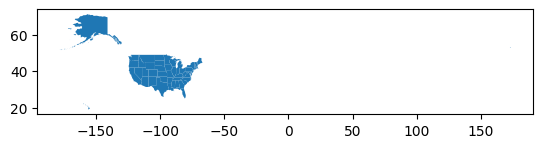

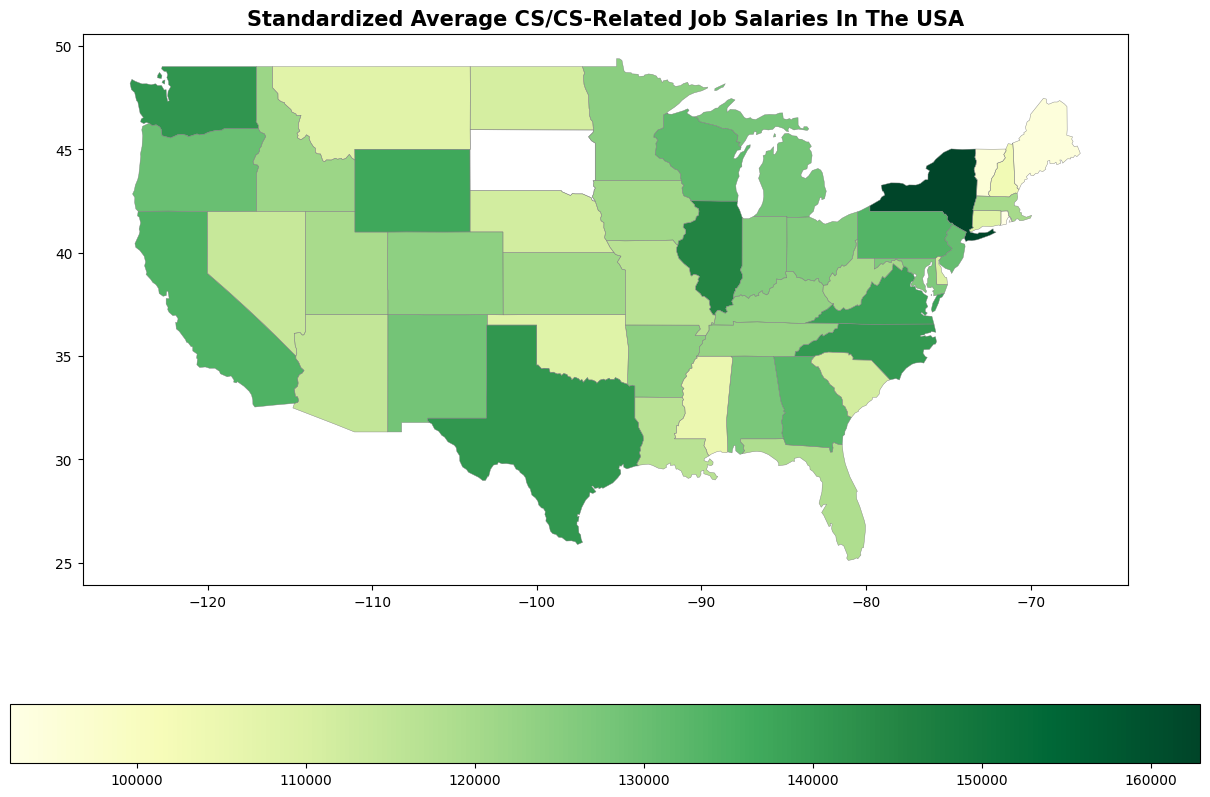

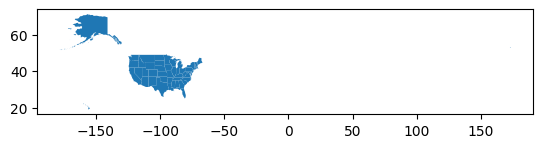

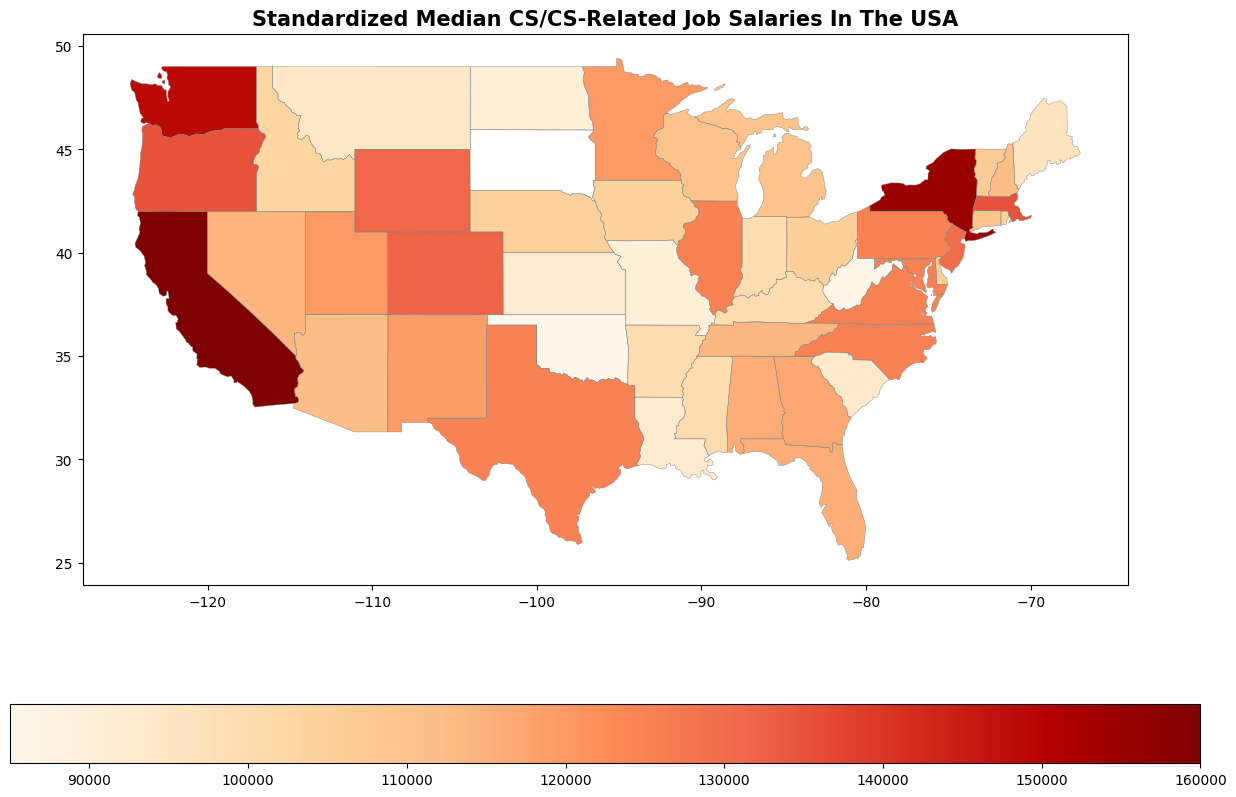

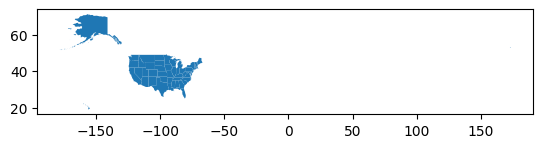

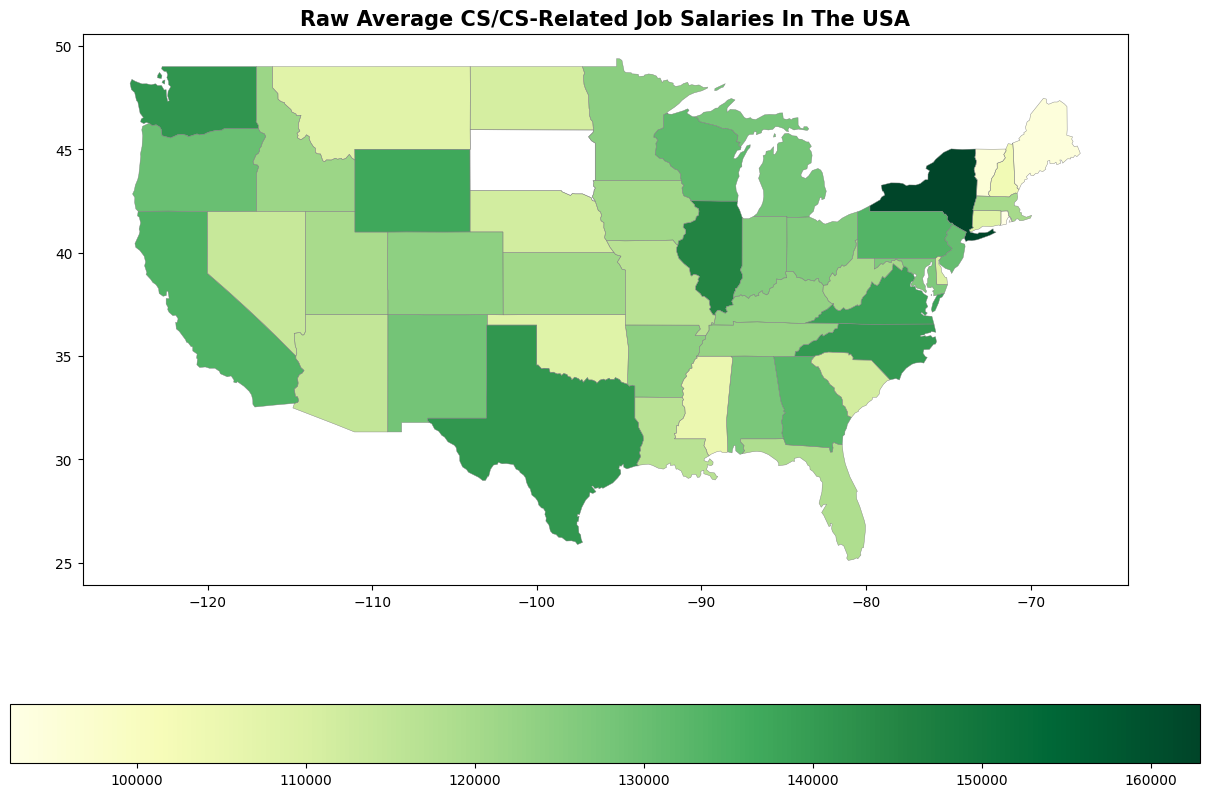

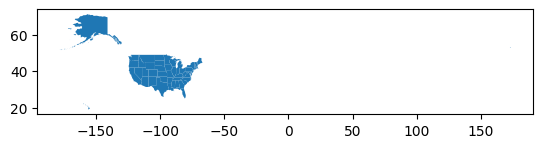

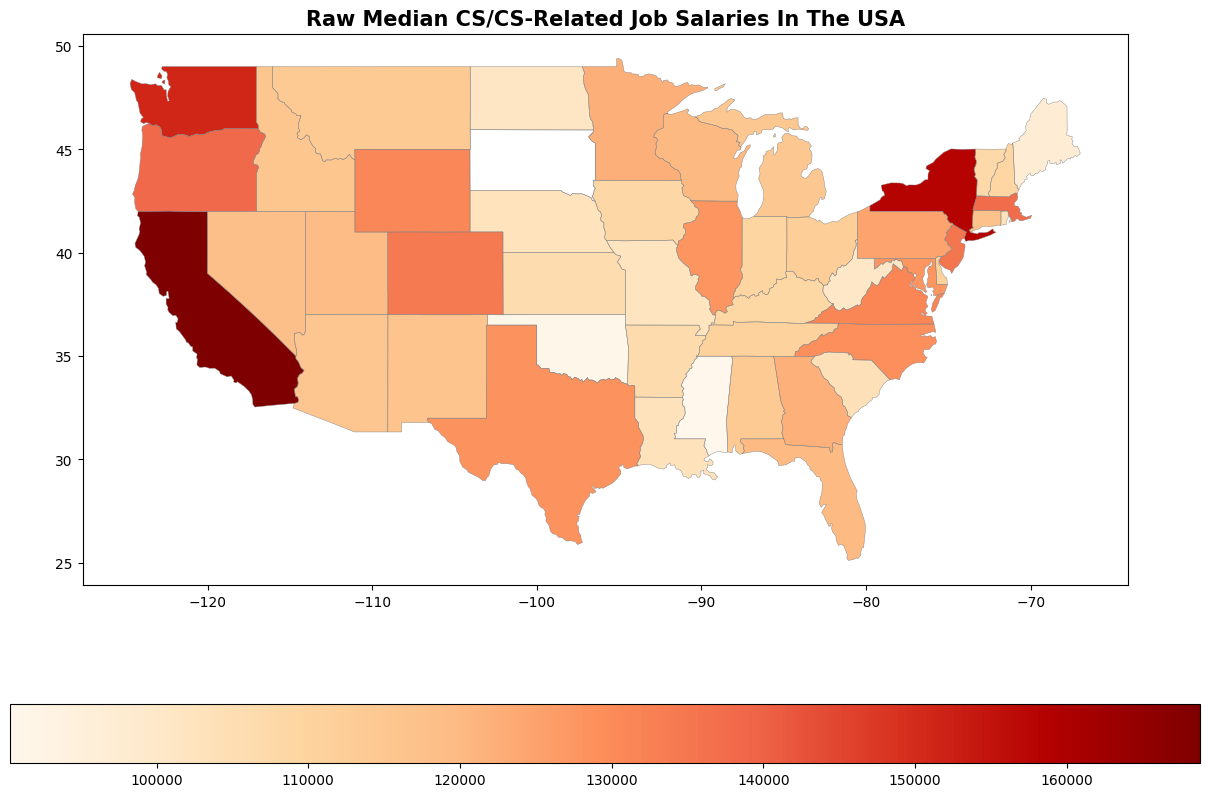

In [68]:
import geopandas as gpd

#Test Chicago Map to see if it works
#chicago = gp.read_file(geodatasets.get_path("geoda.chicago_commpop"))
#chicago.plot()

#gdf = gpd.read_file("Alabama.json")
#gdf.plot()

#alabama = df[df.state == 'AL']
#print(alabama['location'].value_counts())
#print(alabama['latitude'].value_counts())
#print(alabama['longitude'].value_counts())

#These three new dataframes are based on the number of times a location appeared in the Alabama specfic dataframe
#rest_index fixes the issue of the series that is created having a bad index column
'''loc = alabama['location'].value_counts().to_frame().reset_index()
print(loc.head())
lat = alabama['latitude'].value_counts().to_frame().reset_index()
print(lat.head())
lng = alabama['longitude'].value_counts().to_frame().reset_index()
loc['latitude'] = lat['index']
loc['longitude'] = lng['index']
print(loc.head())'''



'''alabama = gpd.GeoDataFrame(alabama, geometry=gpd.points_from_xy(alabama.longitude, alabama.latitude), crs="EPSG:4326")
print(alabama.head())

ax = gdf.boundary.plot()
alabama.plot(ax=ax, color="red")

gdf2 = gpd.read_file("Alabama2.geojson")
#gdf2.plot()

ax = gdf2.boundary.plot()
alabama.plot(ax=ax, color="red")'''


usa = gpd.read_file("us-states.json")
usa.plot()
#usa = usa.merge(
    #right=dfStates,
    #left_on='name',
    #right_on='State',
    #how='left'
#)

usa['salary'] = dfStates['standardizedAverageSalaries']
usa = usa[~usa['name'].isin(['Alaska', 'Hawaii'])]
print(usa.columns)
numListings = usa['salary'].sum()
ax = usa.boundary.plot(edgecolor='gray', linewidth=0.3, figsize=(15.36,10.24))
ax.set_title('Standardized Average CS/CS-Related Job Salaries In The USA', size=15, weight='bold')
usa.plot(ax=ax, column='salary', cmap='YlGn', legend=True, legend_kwds={'shrink':1, 'orientation':'horizontal'})
plt.savefig("salarymaps/standardaveragesalary.jpg")



usa = gpd.read_file("us-states.json")
usa.plot()
usa['salary'] = dfStates['medianSalary']
usa = usa[~usa['name'].isin(['Alaska', 'Hawaii'])]
numListings = usa['salary'].sum()
ax = usa.boundary.plot(edgecolor='gray', linewidth=0.3, figsize=(15.36,10.24))
ax.set_title('Standardized Median CS/CS-Related Job Salaries In The USA', size=15, weight='bold')
usa.plot(ax=ax, column='salary', cmap='OrRd', legend=True, legend_kwds={'shrink':1, 'orientation':'horizontal'})
plt.savefig("salarymaps/standardmediansalary.jpg")


usa = gpd.read_file("us-states.json")
usa.plot()
usa['salary'] = dfStates['standardizedAverageSalaries']
usa = usa[~usa['name'].isin(['Alaska', 'Hawaii'])]
numListings = usa['salary'].sum()
ax = usa.boundary.plot(edgecolor='gray', linewidth=0.3, figsize=(15.36,10.24))
ax.set_title('Raw Average CS/CS-Related Job Salaries In The USA', size=15, weight='bold')
usa.plot(ax=ax, column='salary', cmap='YlGn', legend=True, legend_kwds={'shrink':1, 'orientation':'horizontal'})
plt.savefig("salarymaps/rawaveragesalary.jpg")



usa = gpd.read_file("us-states.json")
usa.plot()
usa['salary'] = dfStates['averageSalary']
usa = usa[~usa['name'].isin(['Alaska', 'Hawaii'])]
print(usa.columns)
numListings = usa['salary'].sum()
ax = usa.boundary.plot(edgecolor='gray', linewidth=0.3, figsize=(15.36,10.24))
ax.set_title('Raw Median CS/CS-Related Job Salaries In The USA', size=15, weight='bold')
usa.plot(ax=ax, column='salary', cmap='OrRd', legend=True, legend_kwds={'shrink':1, 'orientation':'horizontal'})
plt.savefig("salarymaps/rawmediansalary.jpg")


#ax = usa.boundary.plot()
#usa.plot(ax=ax, column='listings')
#plt.show()



In [15]:
import folium
from folium.plugins import HeatMap

print(capitals.to_string())
print(dfStates.to_string())

#For all 50 states, generate a specific heatmap?
for i in range(50):
    currState = states3[i]
    currStateJobs = df[df.state == currState]
    heatMapData = currStateJobs['location'].value_counts().to_frame().reset_index()

    stateLat = capitals.loc[i, 'latitude'] #pulls current state from aggregate and looks at its latitude of geographic state center
    stateLng = capitals.loc[i, 'longitude']
    print(str(currState) + " " + str(stateLat) + ", " + str(stateLng))

    #For edge case of no jobs found (notably Alaska)
    if len(heatMapData.index) <= 0:
        emptyMap = folium.Map(location=[stateLat, stateLng], zoom_start=5)
        currState = states.get(currState)
        fileName = "stateheatmaps/" + str(currState) + ".html"
        emptyMap.save(fileName)
        continue

    coords = pd.DataFrame()
    for index, row in heatMapData.iterrows():
        coords.loc[index, 'latitude'] = lat.get(row['index'])
        coords.loc[index, 'longitude'] = lng.get(row['index'])

    heatMapData['latitude'] = coords['latitude']
    heatMapData['longitude'] = coords['longitude']
    #print(heatMapData.to_string())


    stateLat = heatMapData.loc[0, 'latitude']
    stateLng = heatMapData.loc[0, 'longitude']
    mapObj2 = folium.Map(location=[stateLat, stateLng], zoom_start=6) #zoom is the amount of zoom and location is where the image center is (coordinate-wise)
    heatMapData = heatMapData[['latitude', 'longitude', 'location']]
    heatMapData = heatMapData.dropna()
    HeatMap(heatMapData).add_to(mapObj2)
    currState = states.get(currState)
    
    #cast current state to enable string arithmetic
    fileName = "stateheatmaps/" + str(currState) + ".html"
    #mapObj2.location = (stateLat, stateLng)
    mapObj2.save(fileName)


#create a heat map for the USA as a whole
heatMapData = df['location'].value_counts().to_frame().reset_index()
coords = pd.DataFrame()
for index, row in heatMapData.iterrows():
    coords.loc[index, 'latitude'] = lat.get(row['index'])
    coords.loc[index, 'longitude'] = lng.get(row['index'])
heatMapData['latitude'] = coords['latitude']
heatMapData['longitude'] = coords['longitude']
usa = folium.Map(location=[39.75, -98.5], zoom_start=4)
heatMapData = heatMapData[['latitude', 'longitude', 'location']]
heatMapData = heatMapData.dropna()
HeatMap(heatMapData).add_to(usa)
usa.save("usaHeatMap.html")


'''

mapObj = folium.Map(location=[35, -86], zoom_start=6)

loc = loc[['latitude', 'longitude', 'location']]
#print(loc.head())
HeatMap(loc).add_to(mapObj)

mapObj.save("test.html")
'''
#print(alabama['location'].value_counts())
#print(alabama['latitude'].value_counts())
#print(alabama['longitude'].value_counts())

#These three new dataframes are based on the number of times a location appeared in the Alabama specfic dataframe
#rest_index fixes the issue of the series that is created having a bad index column


'''
california = df[df.state == 'CA']
loc2 = california['location'].value_counts().to_frame().reset_index()
print(loc2)
print(lat)
print(lng)
coords = pd.DataFrame()
for index, row in loc2.iterrows():
    coords.loc[index, 'latitude'] = lat.get(row['index'])
    coords.loc[index, 'longitude'] = lng.get(row['index'])

loc2['latitude'] = coords['latitude']
loc2['longitude'] = coords['longitude']
#lat2 = california['latitude'].value_counts().to_frame().reset_index()
#lng2 = california['longitude'].value_counts().to_frame().reset_index()
#THIS METHOD DOES NOT WROK BECAUSE SOME LATITUDES CAN APPEAR MORE THAN ITS LONGITUDE, MEANING YOU MUST CHECK THEM AS PAIRS
#ANOTHER WAY TO DO THIS IS BY INSTEAD ONCE AGAIN REASSIGNING THEIR RESPECTIVE COORDINATES

#loc2['latitude'] = lat2['index']
#loc2['longitude'] = lng2['index']

mapObj2 = folium.Map(location=[35, -86], zoom_start=9)
loc2 = loc2[['latitude', 'longitude', 'location']]
loc2 = loc2.dropna()
print(loc2.to_string())
HeatMap(loc2).add_to(mapObj2)
mapObj2.save("California.html")

# latitude has an error!!!!

loc2 = df['location'].value_counts().to_frame().reset_index()
coords = pd.DataFrame()
for index, row in loc2.iterrows():
    coords.loc[index, 'latitude'] = lat.get(row['index'])
    coords.loc[index, 'longitude'] = lng.get(row['index'])

loc2['latitude'] = coords['latitude']
loc2['longitude'] = coords['longitude']

mapObj2 = folium.Map(location=[35, -86], zoom_start=9)
loc2 = loc2[['latitude', 'longitude', 'location']]
loc2 = loc2.dropna()
HeatMap(loc2).add_to(mapObj2)
mapObj2.save("errortest.html")

'''

             state  latitude  longitude
0          Alabama   32.7794   -86.8287
1           Alaska   64.0685  -152.2782
2          Arizona   34.2744  -111.6602
3         Arkansas   34.8938   -92.4426
4       California   37.1841  -119.4696
5         Colorado   38.9972  -105.5478
6      Connecticut   41.6219   -72.7273
7         Delaware   38.9896   -75.5050
8          Florida   28.6305   -82.4497
9          Georgia   32.6415   -83.4426
10          Hawaii   20.2927  -156.3737
11           Idaho   44.3509  -114.6130
12        Illinois   40.0417   -89.1965
13         Indiana   39.8942   -86.2816
14            Iowa   42.0751   -93.4960
15          Kansas   38.4937   -98.3804
16        Kentucky   37.5347   -85.3021
17       Louisiana   31.0689   -91.9968
18           Maine   45.3695   -69.2428
19        Maryland   39.0550   -76.7909
20   Massachusetts   42.2596   -71.8083
21        Michigan   44.3467   -85.4102
22       Minnesota   46.2807   -94.3053
23     Mississippi   32.7364   -89.6678


'\ncalifornia = df[df.state == \'CA\']\nloc2 = california[\'location\'].value_counts().to_frame().reset_index()\nprint(loc2)\nprint(lat)\nprint(lng)\ncoords = pd.DataFrame()\nfor index, row in loc2.iterrows():\n    coords.loc[index, \'latitude\'] = lat.get(row[\'index\'])\n    coords.loc[index, \'longitude\'] = lng.get(row[\'index\'])\n\nloc2[\'latitude\'] = coords[\'latitude\']\nloc2[\'longitude\'] = coords[\'longitude\']\n#lat2 = california[\'latitude\'].value_counts().to_frame().reset_index()\n#lng2 = california[\'longitude\'].value_counts().to_frame().reset_index()\n#THIS METHOD DOES NOT WROK BECAUSE SOME LATITUDES CAN APPEAR MORE THAN ITS LONGITUDE, MEANING YOU MUST CHECK THEM AS PAIRS\n#ANOTHER WAY TO DO THIS IS BY INSTEAD ONCE AGAIN REASSIGNING THEIR RESPECTIVE COORDINATES\n\n#loc2[\'latitude\'] = lat2[\'index\']\n#loc2[\'longitude\'] = lng2[\'index\']\n\nmapObj2 = folium.Map(location=[35, -86], zoom_start=9)\nloc2 = loc2[[\'latitude\', \'longitude\', \'location\']]\nloc2 = loc2